In [1]:
!pip install kaggle

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [3]:
!kaggle competitions download -c cifar-10

 99% 711M/715M [00:04<00:00, 203MB/s]
100% 715M/715M [00:04<00:00, 172MB/s]


In [4]:
!ls

cifar-10.zip  kaggle.json  sample_data


In [5]:
from zipfile import ZipFile
dataset = '/content/cifar-10.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [6]:
!ls

cifar-10.zip  kaggle.json  sample_data	sampleSubmission.csv  test.7z  train.7z  trainLabels.csv


In [7]:
!pip install py7zr

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.0/67.0 kB 981.4 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 13.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 412.3/412.3 kB 39.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.9/138.9 kB 16.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 kB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.1/93.1 kB 11.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 57.5 MB/s eta 0:00:00


In [8]:
import py7zr

archive = py7zr.SevenZipFile('/content/train.7z', mode='r')
archive.extractall()
archive.close()

In [9]:
!ls

cifar-10.zip  sample_data	    test.7z  train.7z
kaggle.json   sampleSubmission.csv  train    trainLabels.csv


In [10]:
import os
import numpy as np
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split

In [11]:
filename = os.listdir('/content/train')

In [12]:
len(filename)

50000

In [13]:
print(filename[0:5])
print(filename[-5:])

['11727.png', '35573.png', '15688.png', '5398.png', '45731.png']
['28083.png', '31554.png', '9299.png', '18937.png', '6366.png']


In [14]:
labels_df = pd.read_csv('/content/trainLabels.csv')

In [15]:
labels_df.shape

(50000, 2)

In [16]:
labels_df.head()

,id,label
0,1,frog
1,2,truck
2,3,truck
3,4,deer
4,5,automobile


In [17]:
labels_df[labels_df['id'] == 5734]

,id,label
5733,5734,cat


In [18]:
labels_df.head(12)

,id,label
0,1,frog
1,2,truck
2,3,truck
3,4,deer
4,5,automobile
5,6,automobile
6,7,bird
7,8,horse
8,9,ship
9,10,cat


In [19]:
labels_df.tail(12)

,id,label
49988,49989,dog
49989,49990,automobile
49990,49991,deer
49991,49992,bird
49992,49993,airplane
49993,49994,automobile
49994,49995,airplane
49995,49996,bird
49996,49997,frog
49997,49998,truck


In [20]:
labels_df['label'].value_counts()

frog          5000
truck         5000
deer          5000
automobile    5000
bird          5000
horse         5000
ship          5000
cat           5000
dog           5000
airplane      5000
Name: label, dtype: int64

In [21]:
labels_df['label']

0              frog
1             truck
2             truck
3              deer
4        automobile
            ...    
49995          bird
49996          frog
49997         truck
49998    automobile
49999    automobile
Name: label, Length: 50000, dtype: object

In [22]:
labels_dictionary = {'airplane':0, 'automobile':1, 'bird':2, 'cat':3, 'deer':4, 'dog':5, 'frog':6, 'horse':7, 'ship':8, 'truck':9}

labels = [labels_dictionary[i] for i in labels_df['label']]

In [23]:
print(labels[0:5])
print(labels[-5:])

[6, 9, 9, 4, 1]
[2, 6, 9, 1, 1]


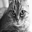

In [24]:
import cv2
from google.colab.patches import cv2_imshow

img = cv2.imread('/content/train/5734.png')
cv2_imshow(img)

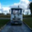

In [25]:
import cv2
from google.colab.patches import cv2_imshow

img = cv2.imread('/content/train/49998.png')
cv2_imshow(img)

In [26]:
labels_df[labels_df['id'] == 49998]

,id,label
49997,49998,truck


In [27]:
id_list = list(labels_df['id'])

In [28]:
print(id_list[0:5])
print(id_list[-5:])

[1, 2, 3, 4, 5]
[49996, 49997, 49998, 49999, 50000]


In [29]:
train_data = '/content/train/'

data = []

for id in id_list:

  image = Image.open(train_data + str(id) + '.png')
  image = np.array(image)
  data.append(image)

In [30]:
len(data)

50000

In [31]:
type(data[0])

numpy.ndarray

In [32]:
data[0].shape

(32, 32, 3)

In [33]:
data[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [34]:
X = np.array(data)
Y = np.array(labels)

In [35]:
type(X)

numpy.ndarray

In [36]:
print(X.shape)
print(Y.shape)

(50000, 32, 32, 3)
(50000,)


In [37]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.5, random_state=24)

In [38]:
#X_train_scaled = X_train/255

#X_test_scaled = X_test/255

In [39]:
#X_train_scaled

In [40]:
X_train[0]

array([[[ 51,  79,  74],
        [ 29,  48,  53],
        [ 15,  46,  47],
        ...,
        [ 98, 128,  92],
        [108, 136,  98],
        [ 44,  81,  48]],

       [[ 67,  78,  72],
        [ 56,  67,  68],
        [ 27,  51,  49],
        ...,
        [ 91, 116,  89],
        [ 97, 118,  90],
        [ 44,  73,  58]],

       [[ 27,  51,  49],
        [ 40,  67,  65],
        [ 30,  50,  49],
        ...,
        [ 65,  86,  67],
        [ 44,  72,  50],
        [ 32,  52,  41]],

       ...,

       [[ 34,  92,  46],
        [ 22,  91,  47],
        [ 23,  97,  49],
        ...,
        [ 36,  98,  55],
        [ 31, 108,  53],
        [ 39, 105,  56]],

       [[ 29,  84,  40],
        [ 31,  88,  44],
        [ 14,  86,  41],
        ...,
        [ 27, 111,  55],
        [ 23, 107,  50],
        [ 22,  99,  47]],

       [[ 26,  94,  41],
        [ 24,  91,  40],
        [ 21,  98,  50],
        ...,
        [ 24, 110,  56],
        [ 23, 110,  52],
        [ 23, 106,  51]]

In [41]:
#!pip install torch torchvision pillow

In [42]:
import tensorflow as tf
from tensorflow import keras

In [43]:
num_of_classes = 10
model = keras.Sequential([

    keras.layers.Flatten(input_shape=(32,32,3)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(num_of_classes, activation='softmax')
])

In [44]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [45]:
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.densenet import preprocess_input, decode_predictions
import numpy as np

In [46]:
model1 = DenseNet121(weights='imagenet')

33188688/33188688 [==============================] - 0s 0us/step


In [47]:
X_train_scaled = X_train.astype('float32') / 255.0
X_test_scaled = X_test.astype('float32') / 255.0

In [48]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True
)
datagen.fit(X_train_scaled)

In [49]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, BatchNormalization, Dropout
base_model = DenseNet121(weights='imagenet', include_top=False, input_shape=(32, 32, 3))
model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    BatchNormalization(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

29084464/29084464 [==============================] - 0s 0us/step


In [50]:
from tensorflow.keras.optimizers import Adam
model.compile(optimizer=Adam(lr=0.001), loss='sparse_categorical_crossentropy', metrics=['acc'])

In [54]:
img_path = ('/content/train/49998.png')
img = image.load_img(img_path, target_size=(224, 224))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = preprocess_input(img_array)

In [55]:
predictions = model1.predict(img_array)

1/1 [==============================] - 4s 4s/step


In [56]:
decoded_predictions = decode_predictions(predictions, top=3)[0]
for i, (imagenet_id, label, score) in enumerate(decoded_predictions):
  print(f"{i + 1}: {label} ({score:.2f})")

35363/35363 [==============================] - 0s 0us/step
1: window_screen (0.31)
2: window_shade (0.05)
3: pedestal (0.05)


In [57]:
from tensorflow.keras import optimizers
model.compile(optimizer=optimizers.RMSprop(lr=0.001), loss='sparse_categorical_crossentropy', metrics=['acc'])

In [66]:
history = model.fit(X_train_scaled, Y_train, validation_split=0.6, epochs=10)

Epoch 1/10
313/313 [==============================] - 31s 99ms/step - loss: 0.8383 - acc: 0.7214 - val_loss: 155.4029 - val_acc: 0.4398
Epoch 2/10
313/313 [==============================] - 26s 82ms/step - loss: 0.7717 - acc: 0.7451 - val_loss: 1.8148 - val_acc: 0.5399
Epoch 3/10
313/313 [==============================] - 27s 85ms/step - loss: 0.6819 - acc: 0.7670 - val_loss: 10.1090 - val_acc: 0.6575
Epoch 4/10
313/313 [==============================] - 26s 84ms/step - loss: 0.6423 - acc: 0.7849 - val_loss: 32.3850 - val_acc: 0.6123
Epoch 5/10
313/313 [==============================] - 27s 87ms/step - loss: 0.5990 - acc: 0.8028 - val_loss: 62.0321 - val_acc: 0.5798
Epoch 6/10
313/313 [==============================] - 31s 100ms/step - loss: 0.5733 - acc: 0.8095 - val_loss: 19.0397 - val_acc: 0.5649
Epoch 7/10
313/313 [==============================] - 26s 83ms/step - loss: 0.5203 - acc: 0.8290 - val_loss: 51.0883 - val_acc: 0.5270
Epoch 8/10
313/313 [==============================] - 

In [67]:
loss, accuracy = model.evaluate(X_test_scaled, Y_test)
print('Test Accuracy =', accuracy)

782/782 [==============================] - 10s 13ms/step - loss: 5.3042 - acc: 0.6262
Test Accuracy = 0.6261600255966187


In [68]:
loss, accuracy = model.evaluate(X_train_scaled, Y_train)
print('Training Accuracy =', accuracy)

782/782 [==============================] - 10s 13ms/step - loss: 5.4319 - acc: 0.6990
Training Accuracy = 0.6990000009536743


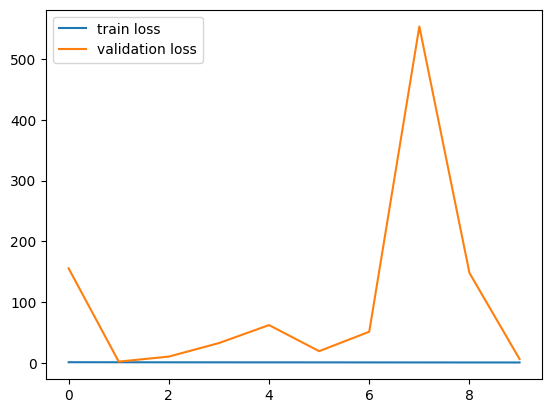

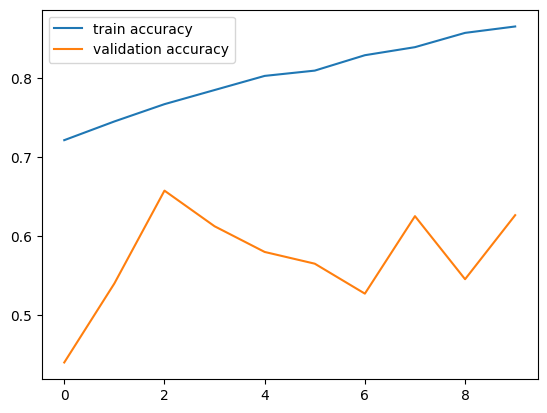

In [69]:
h = history

# plot the loss value
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

# plot the accuracy value
plt.plot(h.history['acc'], label='train accuracy')
plt.plot(h.history['val_acc'], label='validation accuracy')
plt.legend()
plt.show()